In [1]:
%matplotlib widget

# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_complete = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_complete.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [3]:
# Checking the number of mice.
#mouse_id_df = pd.unique(mouse_complete["Mouse ID"])
len(pd.unique(mouse_complete["Mouse ID"]))


249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_complete[mouse_complete.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]

odd_mouse_out = pd.unique(duplicate_rows["Mouse ID"])

odd_mouse_out


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate_data = mouse_complete[(mouse_complete["Mouse ID"] == "g989")]
duplicate_data = mouse_complete[mouse_complete["Mouse ID"].isin(odd_mouse_out)]
duplicate_data


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_complete =  mouse_complete[~mouse_complete["Mouse ID"].isin(odd_mouse_out)]
clean_mouse_complete.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [7]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(clean_mouse_complete["Mouse ID"]))

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
means = clean_mouse_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
medians = clean_mouse_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variances = clean_mouse_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_deviations = clean_mouse_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sems = clean_mouse_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume" : means,
                              "Median Tumor Volume" : medians,
                              "Tumor Volume Variance" : variances,
                              "Tumor Volumestd" : std_deviations,
                              "Tumor Volumesem" : sems
                             })

summary_stats


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volumestd  Tumor Volumesem  
Drug Regimen                                    
Capomulin            4.994774         0.329346  
Ceftamin             6.268188         0.469821  
Infubinol            6.567243         0.492236  
Ketapril             8.279709         0.603860  
Naftisol             8.134708         0.596466  
Placebo              7.821003         0.581331  
Propriva             6.622085         0.544332  
Ramicane             4.846308         0.320955  
Stelasyn             7.710419         0.573111  
Zoniferol            6.966589         0.516398

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_stats = clean_mouse_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","sum","var","std","sem"]) ##How to show heading of Tumor Volume
agg_summary_stats

mean           sum        var       std       sem
Drug Regimen                                                        
Capomulin     40.675741   9355.420462  24.947764  4.994774  0.329346
Ceftamin      52.591172   9361.228582  39.290177  6.268188  0.469821
Infubinol     52.884795   9413.493529  43.128684  6.567243  0.492236
Ketapril      55.235638  10384.299876  68.553577  8.279709  0.603860
Naftisol      54.331565  10105.671026  66.173479  8.134708  0.596466
Placebo       54.033581   9780.078122  61.168083  7.821003  0.581331
Propriva      52.320930   7743.497619  43.852013  6.622085  0.544332
Ramicane      40.216745   9169.417875  23.486704  4.846308  0.320955
Stelasyn      54.233149   9816.199991  59.450562  7.710419  0.573111
Zoniferol     53.236507   9689.044192  48.533355  6.966589  0.516398

## Bar and Pie Charts

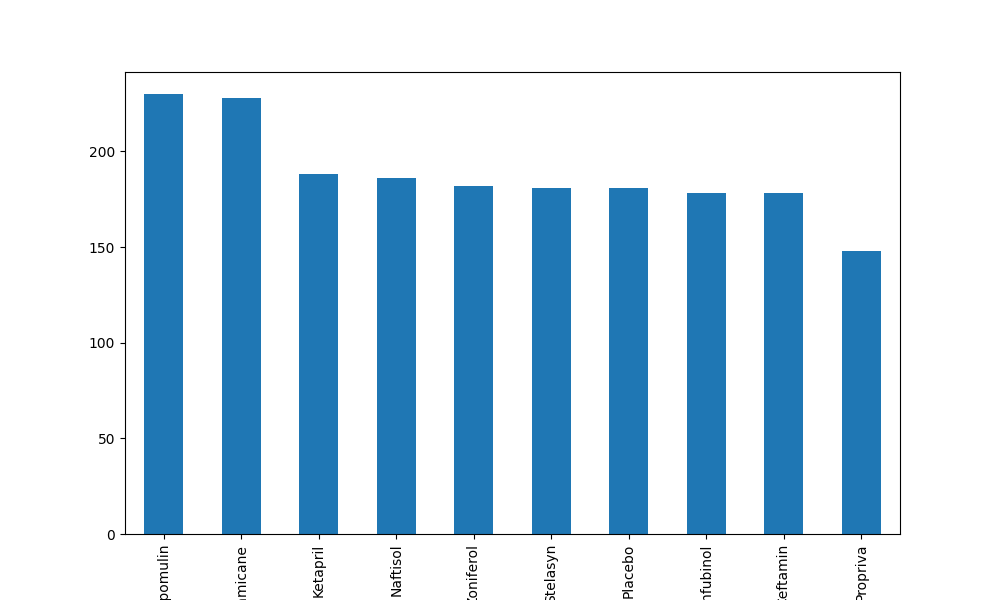

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_mouse_complete["Drug Regimen"].value_counts()
regimen_counts.plot(kind='bar', figsize=(10, 6))
plt.show()


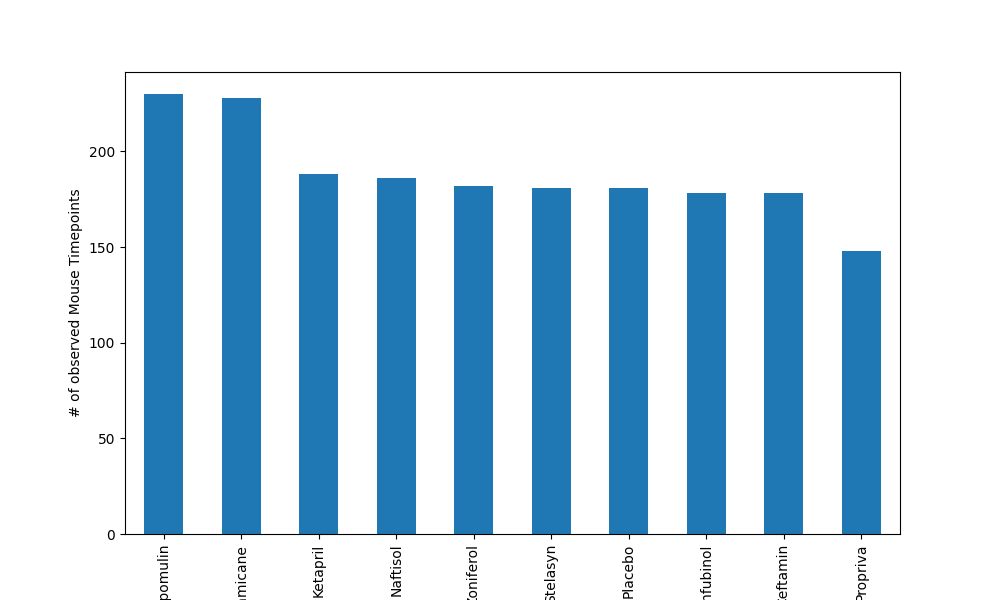

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#x_axis = np.arrange(len(clean_mouse_complete))
#plt.bar(x_axis, regimen_counts)
#plt.xticks(rotation = "vertical")
#rows_chart = clean_mouse_complete.plot(kind = "bar")
#plt.show()

figure1 = regimen_counts.plot(kind = "bar", ylabel="# of observed Mouse Timepoints")
xticklabels = regimen_counts.index
plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = clean_mouse_complete["Sex"].value_counts().index

sizes = clean_mouse_complete["Sex"].value_counts()

plt.pie(sizes, labels=labels, autopct="%1.1f%%")



NameError: name 'plt2' is not defined

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
